In [1]:
!pip install tensorflow==2.0.0-alpha0

     |████████████████████████████████| 79.9MB 86kB/s 
     |████████████████████████████████| 419kB 50.8MB/s 
     |████████████████████████████████| 3.0MB 48.6MB/s 
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


In [2]:
!pip install --upgrade -q gspread

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
train_file = "/content/drive/My Drive/Colab Notebooks/t9.zip"

In [5]:
import zipfile

with zipfile.ZipFile(train_file, 'r') as z:
    z.extractall("/rain")

In [6]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('clothstructlink').sheet1

In [7]:
!pip install h5py pyyaml

In [8]:
import os
import cv2

def load_image(file_path):
    return cv2.imread(file_path)

def extract_label(file_name):
     if "jacket" in file_name :
       return 1
     elif  'kurti'in file_name :
       return 2
     elif  'long'in file_name :
       return 3
     elif 'one' in file_name :
       return 4
     elif 'pant' in file_name :
       return 5
     elif  'saree' in file_name :
       return 6
     elif  'sari' in file_name :
       return 6
     elif  'tea' in file_name :
       return 7
     elif  'short' in file_name :
       return 8
     elif  'skirt' in file_name :
       return 9
     elif  'shirt' in file_name :
       return 10

     else:
       return 11
    
       
     
train_path = "/rain/"
image_files = os.listdir(train_path)
train_images = [load_image(train_path + file) for file in image_files]
train_labels = [extract_label(file) for file in image_files]

In [9]:
import numpy as np

In [10]:
def preprocess_image(img, side=96):
    min_side = min(img.shape[0], img.shape[1])
    img = img[:min_side, :min_side]
    img = cv2.resize(img, (side,side))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img / 255.0

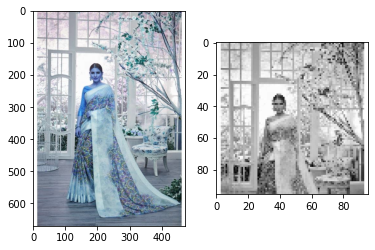

In [11]:

import matplotlib.pyplot as plt
%matplotlib inline

preview_index = 33
plt.subplot(1,2,1)
plt.imshow(train_images[preview_index])
plt.subplot(1,2,2)
plt.imshow(preprocess_image(train_images[preview_index]), cmap="gray")

In [12]:
print(len(train_images))

7028


In [13]:
for i in range(len(train_images)):
    
    train_images[i] = preprocess_image(train_images[i])

In [14]:
import numpy as np

train_images = np.expand_dims(train_images, axis=-1)
train_labels = np.array(train_labels)
print(train_images.shape, train_labels.shape)

(7028, 96, 96, 1) (7028,)


In [15]:
import tensorflow as tf
print("Tensorflow:", tf.__version__)

layers = [
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding="same", activation=tf.nn.relu, input_shape=train_images.shape[1:]),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=256, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=12, activation=tf.nn.softmax)
]

model = tf.keras.Sequential(layers)
model.summary()

model.compile(optimizer=tf.optimizers.Adam(),
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.metrics.SparseCategoricalAccuracy()])
history=model.fit(train_images, train_labels, epochs=30, batch_size=50)
model.save_weights("model.tf")

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

Tensorflow: 2.0.0-alpha0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (N

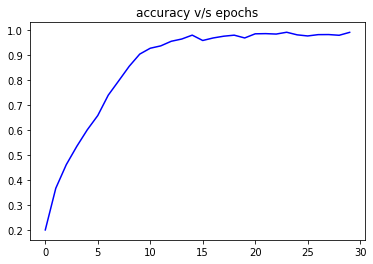

In [16]:
accuracy = history.history['sparse_categorical_accuracy']
epochs = range(len(accuracy))
plt.title("accuracy v/s epochs")
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.show()

In [17]:
val_file = "/content/drive/My Drive/Colab Notebooks/structure_val.zip"

In [23]:
import zipfile

with zipfile.ZipFile(val_file, 'r') as z:
    z.extractall("/val")

In [24]:
val_path = "/val/"
image_files = os.listdir(val_path)
val_images = [load_image(val_path + file) for file in image_files]
val_labels = [extract_label(file) for file in image_files]

In [25]:
for i in range(len(val_images)):
    
    val_images[i] = preprocess_image(val_images[i])

In [26]:
import numpy as np

val_images = np.expand_dims(val_images, axis=-1)
val_labels = np.array(val_labels)
print(val_images.shape, val_labels.shape)

(7357, 96, 96, 1) (7357,)


In [27]:
print('\n# Evaluate on validation data')
test_scores = model.evaluate(val_images, val_labels)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])


# Evaluate on validation data
7357/7357 [==============================] - 24s 3ms/sample - loss: 0.1145 - sparse_categorical_accuracy: 0.9845
Test loss: 0.11447274292744451
Test accuracy: 0.9845046


In [99]:
from google.colab import files
uploads = files.upload()

Saving one3.jpg to one3 (1).jpg


In [100]:
def func(n):
  

  if n==1:
    return "jacket"
  elif n==2:
    return "kurti"
  elif n==3:
    return "long"
  elif n==4:
    return "one"
  elif n==5:
    return "pant"
  elif n==6:
    return "saree"
  elif n==7:
    return "t-shirt"
  elif n==8:
    return "short"
  elif n==9:
    return "skirt"
  elif n==10:
    return "shirt"
  else:
    return " not detected "

One Piece links:
https://www.amazon.in/Women-Dresses/b?node=1968445031
https://www.myntra.com/one-piece-dresses
https://www.flipkart.com/q/one-piece-dress
https://www.lulus.com/categories/13_2186/short-dresses.html
https://www.tobi.com/dresses/short-dresses


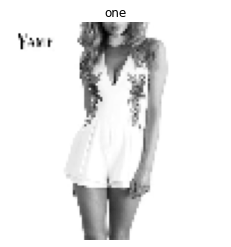

In [101]:
eval_images = [preprocess_image(load_image(file)) for file in uploads.keys()]
eval_model = tf.keras.Sequential(layers)
eval_model.load_weights("model.tf")
eval_predictions = model.predict(np.expand_dims(eval_images, axis=-1))

cols = 4
rows = np.ceil(len(eval_images)/cols)
fig = plt.gcf()
fig.set_size_inches(cols * 4, rows * 4)

for i in range(len(eval_images)):
    #plt.subplot(rows, cols, i+1)
    plt.imshow(eval_images[i], cmap="gray")
    
    plt.title( func(np.argmax(eval_predictions[i])))
    rows = worksheet.row_values((np.argmax(eval_predictions[i])))
    for x in range(len(rows)):
      print(rows[x])
    



              
    plt.axis('off')

In [102]:
if os.path.isfile("/content/temp/photo.jpg"):
    os.remove("/content/temp/photo.jpg")

In [103]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


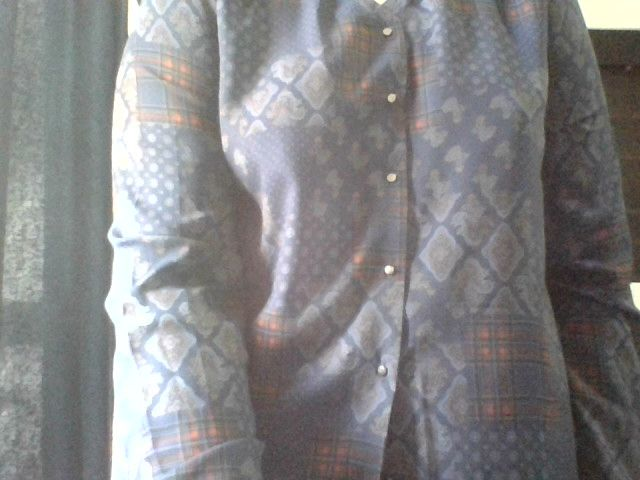

In [104]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [94]:
import os
import shutil
if os.path.isfile("/tmp/photo.jpg"):
    os.remove("/tmp/photo.jpg")

shutil.move("/content/photo.jpg", "/tmp")

'/tmp/photo.jpg'

Shirts links:.
https://www.amazon.com/s?k=formal+shirt&rh=n%3A2476517011&ref=nb_sb_noss
https://www.stylight.com/search.action?tag=10203&tag=10268&campaignId=14212&utm_source=yahoo&utm_medium=cpc&utm_content=adcenter+us&utm_campaign=14212&view=perf&ef_id=WqfLuQAAAK0iBja8:20200626132423:s
https://www.macys.com/shop/b/mens-formal-shirts?id=74302
https://www.josbank.com/c/formal-dress-shirts
https://www.josbank.com/c/formal-dress-shirts


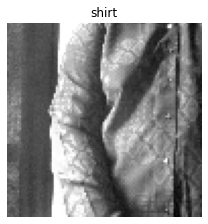

In [95]:
eval_images = [preprocess_image(load_image("/tmp/photo.jpg")) ]
eval_model = tf.keras.Sequential(layers)
eval_model.load_weights("model.tf")
eval_predictions = model.predict(np.expand_dims(eval_images, axis=-1))

cols = 4
rows = np.ceil(len(eval_images)/cols)
fig = plt.gcf()
fig.set_size_inches(cols * 4, rows * 4)
for i in range(len(eval_images)):
    plt.subplot(rows, cols, i+1)
    plt.imshow(eval_images[i], cmap="gray")
    plt.title( func(np.argmax(eval_predictions[i])))
    rows = worksheet.row_values((np.argmax(eval_predictions[i])))
    for x in range(len(rows)):
      print(rows[x])

              
    plt.axis('off')